In [2]:
import pandas as pd

games_info = pd.read_csv("C:\\Users\\dijan\\Documents\\GitHub\\Reccomender-system-for-board-games\\data\\raw\\games_detailed_info2025.csv")


In [ ]:
games_info.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27780 entries, 0 to 27779
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     27780 non-null  int64  
 1   type                           27780 non-null  object 
 2   id                             27780 non-null  int64  
 3   thumbnail                      27764 non-null  object 
 4   image                          27761 non-null  object 
 5   alternate                      11508 non-null  object 
 6   description                    27779 non-null  object 
 7   yearpublished                  27780 non-null  int64  
 8   minplayers                     27780 non-null  int64  
 9   maxplayers                     27780 non-null  int64  
 10  suggested_num_players          27780 non-null  object 
 11  suggested_playerage            27777 non-null  object 
 12  suggested_language_dependence  27774 non-null 

In [32]:
games_info.sort_values(by='usersrated', ascending=False)
n = int(0.1* len(games_info))

games_info['usersrated'].iloc[n]

np.int64(1559)

Kick thumbnail, type(everywhere is boargame), image, alternate, RPG item rank, customizable rank, accesory rank because almost all nan.

In [28]:
print(games_info['type'].value_counts())

#print(games_info['thumbnail'].value_counts())

print(games_info['alternate'].value_counts())

print(games_info['yearpublished'].value_counts())

print(games_info['boardgamecategory'].value_counts())

type
boardgame    27780
Name: count, dtype: int64
alternate
['Средневековая академия']                                                                                                                    2
['Afrika']                                                                                                                                    2
['掌上间谍']                                                                                                                                      2
['Switch']                                                                                                                                    2
['Cluedo']                                                                                                                                    2
                                                                                                                                             ..
['Monopoly: FIFA WK 2006 Editie', 'Monopoly: FIFA WM 2006 Edition']         

In [12]:
bgg_reviews = pd.read_csv("C:\\Users\\dijan\\Documents\\GitHub\\Reccomender-system-for-board-games\\data\\raw\\bgg-26m-reviews.csv")

In [18]:
bgg_reviews.info()
bgg_reviews.head()

#rename columns id to ID 
bgg_reviews.rename(columns={'id': 'ID'}, inplace=True)
games_info.rename(columns={'id': 'ID'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26200012 entries, 0 to 26200011
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   user        object 
 2   rating      float64
 3   comment     object 
 4   ID          int64  
 5   name        object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.2+ GB


count     27780.000000
mean        942.549820
std        4199.337066
min          30.000000
25%          56.000000
50%         125.000000
75%         408.000000
max      132477.000000
Name: usersrated, dtype: float64


(array([2.6683e+04, 5.3700e+02, 1.8800e+02, 1.1800e+02, 7.5000e+01,
        4.6000e+01, 2.8000e+01, 2.3000e+01, 1.3000e+01, 1.1000e+01,
        1.2000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+00, 2.0000e+00,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([3.000000e+01, 4.444900e+03, 8.859800e+03, 1.327470e+04,
        1.768960e+04, 2.210450e+04, 2.651940e+04, 3.093430e+04,
        3.534920e+04, 3.976410e+04, 4.417900e+04, 4.859390e+04,
        5.300880e+04, 5.742370e+04, 6.183860e+04, 6.625350e+04,
        7.066840e+04, 7.508330e+04, 7.949820e+04, 8.391310e+04,
        8.832800e+04, 9.274290e+04, 9.715780e+04, 1.015727e+05,
        1.059876e+05, 1.104025e+05, 1.148174e+05, 1.192323e+05,
        1.236472e+05, 1.280621e+05, 1.324770e+05]),
 <BarContainer object of 30 artists>)

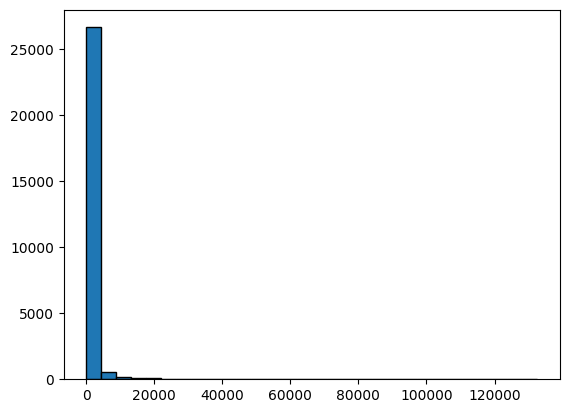

In [31]:
import matplotlib.pyplot as plt   
print(games_info['usersrated'].describe())
plt.hist(games_info['usersrated'], bins=30, edgecolor='black')

In [25]:
bgg_reviews.columns

Index(['Unnamed: 0', 'user', 'rating', 'comment', 'ID', 'name'], dtype='object')

In [24]:
def expand_dataset(bgg_reviews, games_info, game_features):
    # Merge the reviews with the game information based on the game ID
    merged_data = pd.merge(bgg_reviews, games_info, left_on='ID', right_on='ID', how='left')
    
    # Select only the relevant features for the recommendation system
    expanded_data = merged_data[bgg_reviews.columns.tolist() + game_features + ['rating']]
    
    return expanded_data


game_features = ['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'averageweight', 'boardgamecategory', 'boardgamemechanic', 'usersrated']

expanded_dataset = expand_dataset(bgg_reviews, games_info, game_features)

KeyError: "['Unnamed: 0', 'name'] not in index"

In [23]:
expanded_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26200012 entries, 0 to 26200011
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   yearpublished      float64
 1   minplayers         float64
 2   maxplayers         float64
 3   playingtime        float64
 4   averageweight      float64
 5   boardgamecategory  object 
 6   boardgamemechanic  object 
 7   usersrated         float64
 8   rating             float64
dtypes: float64(7), object(2)
memory usage: 1.8+ GB


AttributeError: 'DataPreprocessor' object has no attribute 'discretize_column'

In [ ]:
import data_prep
data_preprocessor = data_prep.DataPreprocessor(games_info, bgg_reviews)
expanded_dataset = data_preprocessor.merge_datasets(featires_to_add=game_features)


In [ ]:

game_info_cut = data_preprocessor.discretize_column(games_info, 'usersrated', bins=5, percent=0.25, drop_original=True )

AttributeError: 'DataPreprocessor' object has no attribute 'discretize_column'

In [34]:
expanded_dataset.head()

,yearpublished,minplayers,maxplayers,playingtime,averageweight,boardgamecategory,boardgamemechanic,usersrated,ID,Unnamed: 0,user,rating,comment,name
0,1995,3,4,120,2.2881,"['Economic', 'Negotiation']","['Chaining', 'Dice Rolling', 'Hexagon Grid', '...",132477,13,0,sidehacker,10.0,NaN,CATAN
1,1995,3,4,120,2.2881,"['Economic', 'Negotiation']","['Chaining', 'Dice Rolling', 'Hexagon Grid', '...",132477,13,1,Varthlokkur,10.0,NaN,CATAN
2,1995,3,4,120,2.2881,"['Economic', 'Negotiation']","['Chaining', 'Dice Rolling', 'Hexagon Grid', '...",132477,13,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",CATAN
3,1995,3,4,120,2.2881,"['Economic', 'Negotiation']","['Chaining', 'Dice Rolling', 'Hexagon Grid', '...",132477,13,3,cypar7,10.0,"I know it says how many plays, but many, many ...",CATAN
4,1995,3,4,120,2.2881,"['Economic', 'Negotiation']","['Chaining', 'Dice Rolling', 'Hexagon Grid', '...",132477,13,4,ssmooth,10.0,NaN,CATAN
